In [366]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [367]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [368]:
#dataset directory
DATADIR = '/content/gdrive/My Drive/Dataset3/'

#classes(categories) of data
CATEGORIES = ['Bow','Burn','Cleftlip']

In [369]:
# image size for resizing the image 
IMG_SIZE=100
#performing preprocessing steps
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()      

In [370]:
#storing trainig length 
lengthofimage = len(training_data)
print(lengthofimage)

68


In [371]:
# for image to be trained we have to convert the image to a array form so,that our model can train on it
# and X should be of type (training_data_length , -1) because SVM takes 2D input to train
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lengthofimage,-1)

#printing the shape of array X not it's data
X.shape

(68, 30000)

In [372]:
# flattening the array and it is a technique that is used to convert multi-dimensional arrays into a 1-D array
X = X/255.0

In [373]:
X[1]

array([0.83529412, 0.90588235, 0.90980392, ..., 0.64313725, 0.65490196,
       0.65490196])

In [374]:
# note : y should be in array form compulsory.
y=np.array(y)
y.shape

(68,)

In [375]:
# data modelling
# applying train_test_split on our data to split the data to train and test
# train (70%) and test (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [376]:
# fitting our data in SVM model
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [377]:
# predicting the X_test
y2 = svc.predict(X_test)

In [378]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.8571428571428571


In [379]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is")
print(classification_report(y_test,y2))

Accuracy on unknown data is
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.75      0.60      0.67         5
           2       0.89      0.89      0.89         9

    accuracy                           0.86        21
   macro avg       0.84      0.83      0.83        21
weighted avg       0.85      0.86      0.85        21



In [380]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [381]:
result

,original,predicted
0,2,2
1,1,1
2,1,2
3,2,2
4,2,2
5,0,0
6,0,0
7,0,0
8,0,0
9,2,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


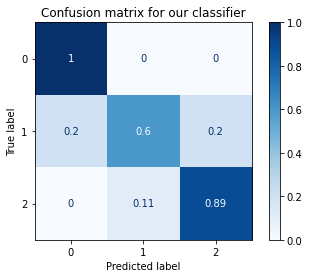

In [382]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(svc, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()